In [1]:
'''libraries list with help showing the version of the libraries being used in this nodebook'''
libraries = []
import random
'''Datasets, arrays and json files'''

import pandas as pd
import numpy as np
import pickle

libraries.append('pandas')
libraries.append('numpy')
libraries.append('pickle')

'''Following progress'''
from tqdm.notebook import tqdm
libraries.append('tqdm')

'''Utilities'''
import collections
from pathlib import Path
from datetime import datetime
import os
import powerlaw 
libraries.append('collections')
libraries.append('pathlib')
libraries.append('datetime')
libraries.append('os')
libraries.append('powerlaw')

'''Plots and figures'''
%matplotlib notebook

import matplotlib.pyplot as plt
import plotly.express as px
libraries.append('matplotlib')
libraries.append('plotly')

plt.rcParams["figure.facecolor"] = "w"

'''Pthon and library version'''
import types
import pkg_resources
import sys
from platform import python_version

import numpy as np
import matplotlib.patches as mpatches

In [2]:
saving_path = '../_generated_files/'

In [3]:
!ls '../_generated_files/Brazil_by_dates'

Brazil_105.csv Brazil_205.txt Brazil_30.csv  Brazil_38.txt  Brazil_470.csv
Brazil_105.txt Brazil_215.csv Brazil_30.txt  Brazil_380.csv Brazil_470.txt
Brazil_115.csv Brazil_215.txt Brazil_300.csv Brazil_380.txt Brazil_480.csv
Brazil_115.txt Brazil_225.csv Brazil_300.txt Brazil_390.csv Brazil_480.txt
Brazil_125.csv Brazil_225.txt Brazil_310.csv Brazil_390.txt Brazil_490.csv
Brazil_125.txt Brazil_235.csv Brazil_310.txt Brazil_400.csv Brazil_490.txt
Brazil_135.csv Brazil_235.txt Brazil_320.csv Brazil_400.txt Brazil_55.csv
Brazil_135.txt Brazil_245.csv Brazil_320.txt Brazil_410.csv Brazil_55.txt
Brazil_145.csv Brazil_245.txt Brazil_330.csv Brazil_410.txt Brazil_65.csv
Brazil_145.txt Brazil_25.csv  Brazil_330.txt Brazil_420.csv Brazil_65.txt
Brazil_155.csv Brazil_25.txt  Brazil_340.csv Brazil_420.txt Brazil_75.csv
Brazil_155.txt Brazil_255.csv Brazil_340.txt Brazil_430.csv Brazil_75.txt
Brazil_165.csv Brazil_255.txt Brazil_35.csv  Brazil_430.txt Brazil_85.csv
Brazil_165.txt Brazil_265.csv Br

In [38]:
with open(saving_path+'list_delays_Brazil.pikle', 'rb') as handle:
    list_delays = pickle.load(handle)
sorted(list_delays);

In [33]:
file_names = []
for n in list_delays:
    name = 'Brazil_{}.txt'.format(n)
    file_names.append(name)

In [34]:
'''The following files were used to calculate beta at different periods with Brazil data'''
#The folder 'new_data' was used. The name of the file need to be changed to 
#'generic_dataset.txt'. The notebook Notebook-FittingModels-covid19.ipynb was used to 
#calculate the fitting and to save the results individually.
#The results are stored in scaling/notebooks/_generated_files/Brazil_by_dates/_results
file_names

['Brazil_25.txt',
 'Brazil_30.txt',
 'Brazil_35.txt',
 'Brazil_38.txt',
 'Brazil_45.txt',
 'Brazil_55.txt',
 'Brazil_65.txt',
 'Brazil_75.txt',
 'Brazil_85.txt',
 'Brazil_95.txt',
 'Brazil_105.txt',
 'Brazil_115.txt',
 'Brazil_125.txt',
 'Brazil_135.txt',
 'Brazil_145.txt',
 'Brazil_155.txt',
 'Brazil_165.txt',
 'Brazil_175.txt',
 'Brazil_185.txt',
 'Brazil_195.txt',
 'Brazil_205.txt',
 'Brazil_215.txt',
 'Brazil_225.txt',
 'Brazil_235.txt',
 'Brazil_245.txt',
 'Brazil_255.txt',
 'Brazil_265.txt',
 'Brazil_275.txt',
 'Brazil_285.txt',
 'Brazil_295.txt',
 'Brazil_300.txt',
 'Brazil_310.txt',
 'Brazil_320.txt',
 'Brazil_330.txt',
 'Brazil_340.txt',
 'Brazil_350.txt',
 'Brazil_360.txt',
 'Brazil_370.txt',
 'Brazil_380.txt',
 'Brazil_390.txt',
 'Brazil_400.txt',
 'Brazil_410.txt',
 'Brazil_420.txt',
 'Brazil_430.txt',
 'Brazil_440.txt',
 'Brazil_450.txt',
 'Brazil_460.txt',
 'Brazil_470.txt',
 'Brazil_480.txt',
 'Brazil_490.txt']

In [ ]:
#Pop
pop_beta = {}
pop_error = {}
#LS
ls_beta = {}
ls_error = {}
for n in sorted(list_delays):
    try:
        with open('../_generated_files/Brazil_by_dates/_results/results_Brazil_'+str(n)+'.pickle', 'rb') as handle: 
            results = pickle.load(handle)
    except:
        break
    (beta, error) =results['Pop']['Beta +- error']
    pop_beta[n] = beta
    pop_error[n] = error
    k =results['LS']
    ls_beta[n] = k[0]
    ls_error[n] = k[1]

<IPython.core.display.Javascript object>


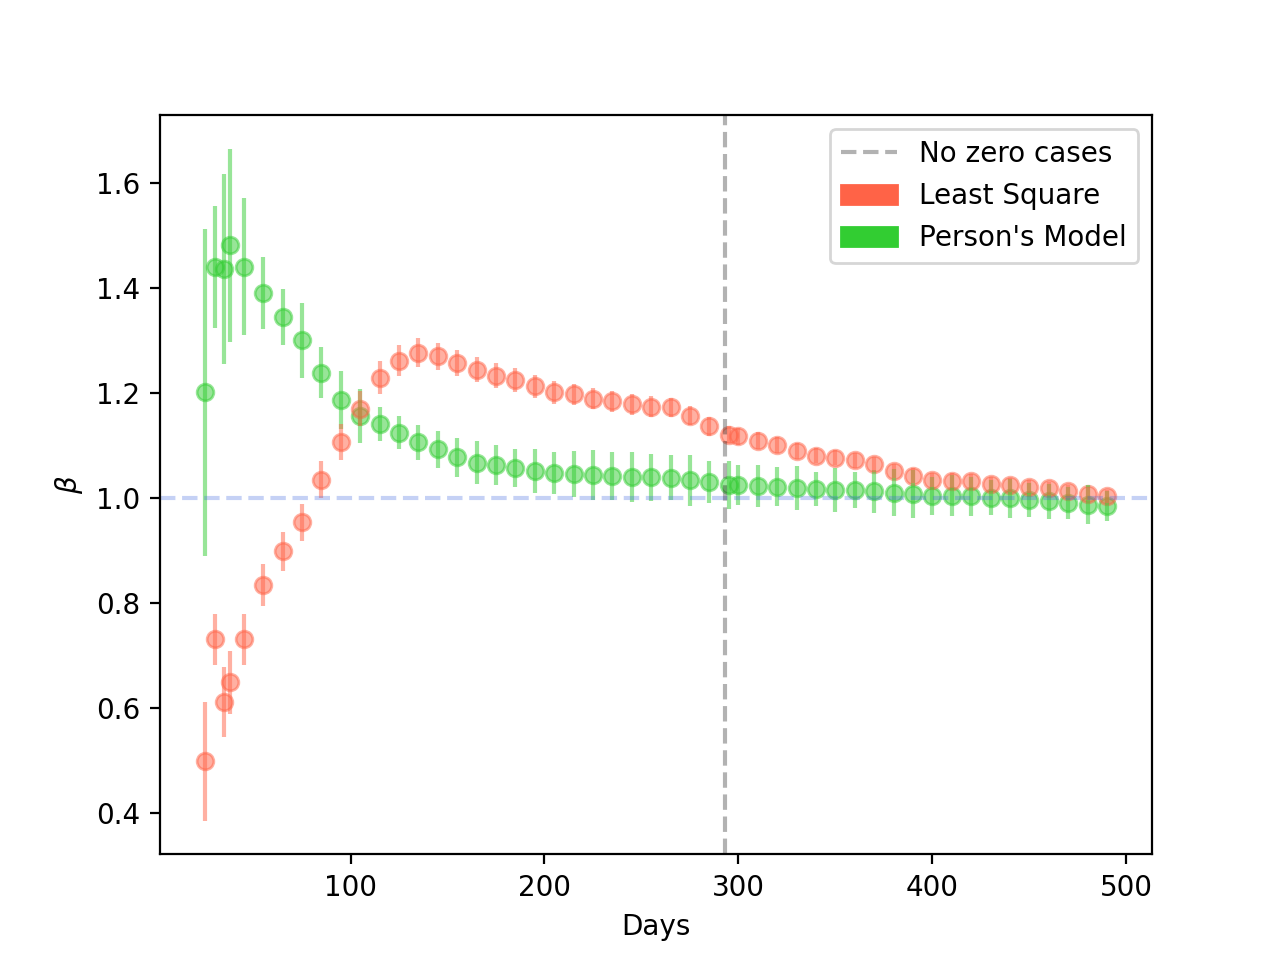

In [39]:
i = 0
n = sorted(list_delays)

handles_x = []
fig, ax1 = plt.subplots()

ax1.axhline(y=1, color='royalblue', alpha = 0.3, linestyle='--')
ax1.axvline(x=293, color='black', alpha = 0.3, linestyle='--', label='No zero cases')
handles_x, labels = plt.gca().get_legend_handles_labels()
red_patch = mpatches.Patch(color='tomato', label='Least Square')
green_patch = mpatches.Patch(color='limegreen', label="Person's Model")

for name, value in pop_beta.items():
    x = n[i]
    y = pop_beta[name]
    
    yerr =pop_error[name]
    ax1.scatter(x, y, label=name, color="limegreen", alpha = 0.5)
    ax1.errorbar(x, y, yerr=yerr, color="limegreen", alpha = 0.5, label=name)
    i += 1

handles_x.append(red_patch)
handles_x.append(green_patch)

i = 0
for name, value in ls_beta.items():
    x = n[i] #should be days and annotate number of cases
    y = ls_beta[name]
    yerr =ls_error[name]
    ax1.scatter(x, y, label=name, color="tomato", alpha = 0.5)
    ax1.errorbar(x, y, yerr=yerr, color="tomato", alpha = 0.5)
    i += 1

ax1.legend(handles=handles_x, loc='upper right')
ax1.set_ylabel(r"$\beta$") 
plt.xlabel("Days")
plt.savefig('../_generated_files/Brazil_by_dates/_results/Betas_Brazil', dpi = 1000)
plt.show()